# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [75]:
import pandas as pd
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [ ]:
# Типы данных:
# bool (все AcceptedCmp, Response, Complain, etc.)
# string (Education, Marital, etc.)
# int (Kidhome, Teenhome, etc.)
# float (MntFishProducts, etc)

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [76]:
# Переведём Income из вида "$57,091.00 " (в marketing.csv) в вид 57091 (float)
df['Income'] = df['Income'].str.replace('.00', '')
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','')
df['Income'] = df['Income'].astype('float')
# Из семинара 8


<ipython-input-76-5bddb6c1e701>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Income'] = df['Income'].str.replace('.00', '')
<ipython-input-76-5bddb6c1e701>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$','')


Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [77]:
# В таблице даты представлены в виде ММ/ДД/ГГ
# Все даты в таблице - позже 2000 года. Значит, необходимо перевести года в вид 20ГГ
# ММ/ДД/ГГ > ГГГГ-ММ-ДД

df['Dt_Customer'] = df['Dt_Customer'].str.replace('/', '-')
# Сейчас данные в виде ММ-ДД-ГГ
for customer in df['Dt_Customer']:
        customer = '20{}-'.format(customer[-2:]) + customer[:-3]


## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [78]:
# Пропуски в Income, 24 пропуска. Обработаем их через медиану.
# Среднее значение было бы искажено на выбросы, которые мы обработаем позже.
# На медианное значение выбросы не влияют, поэтому мы можем использовать её.

df.isnull().sum()

df['Income'] = df['Income'].fillna(df['Income'].median())

df.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

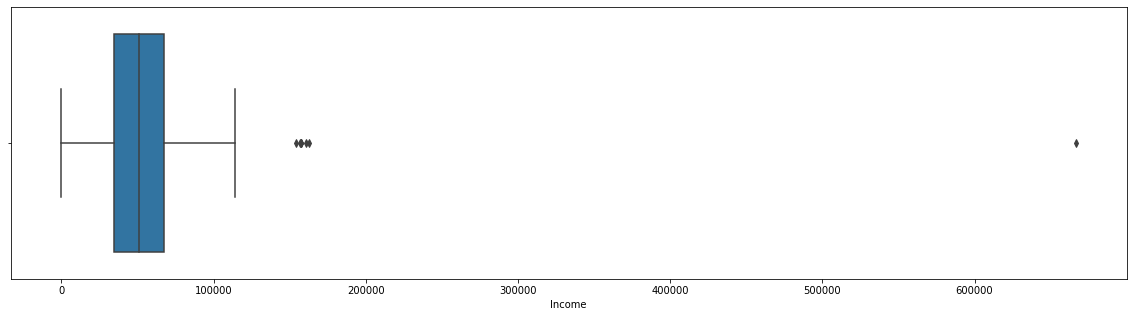

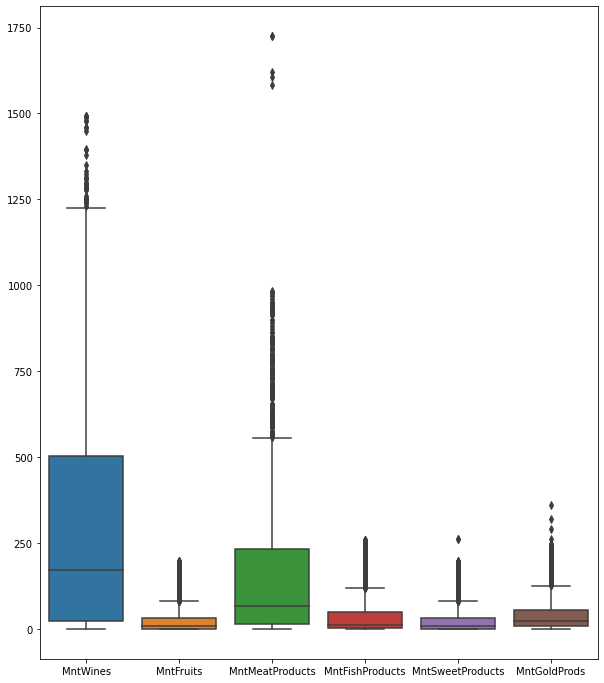

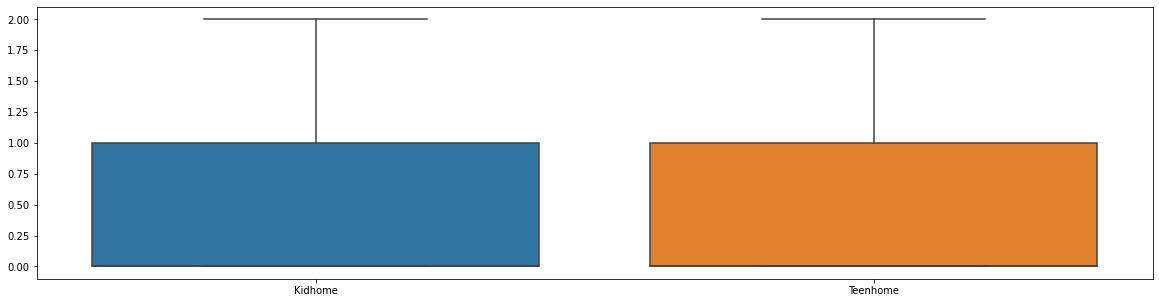

In [79]:
# Ваш код и комментарий
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig = plt.gcf()
fig.set_size_inches(20, 5)
cx = sns.boxplot(x=df['Income'])
plt.show()

fig = plt.gcf()
fig.set_size_inches(10, 12)
Mnts = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
ax = sns.boxplot(data=Mnts)
plt.show()

fig = plt.gcf()
fig.set_size_inches(20, 5)
Homes = df[['Kidhome', 'Teenhome']]
bx = sns.boxplot(data=Homes)
plt.show()

# Выбросы есть в переменной Income (очень сильно отличающиеся от средних значений)
# А также во всех переменных Mnt, особенно в переменной MntMeatProducts
# Ящик с усами - один из наиболее распространённых методов визуализации выбросов
# Опирается на работу с квартилями. Всё, что выходит за нижний и верхний квартиль ("усы") - выбросы
# Выбросы мешают оценить данные с точки зрения статистики, так как искажают среднее значение.
# Выбросы не влияют на медиану, но искажают значение среднего.
# Чтобы этого избежать, необходимо избавиться от выбросов.
# Для построения ящиков использованы методы библиотеки Seaborn:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

# Удаление выбросов

Q1 = np.percentile(df['Income'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['Income'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df = df[(df['Income']>=lower)&(df['Income']<=upper)]

#
Q1 = np.percentile(Mnts, 25,
                   method = 'midpoint')
 
Q3 = np.percentile(Mnts, 75,
                   method = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df = df[(Mnts>=lower)&(Mnts<=upper)]

#
Q1 = np.percentile(Homes, 25,
                   method = 'midpoint')
 
Q3 = np.percentile(Homes, 75,
                   method = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df = df[(Homes>=lower)&(Homes<=upper)]

# fig = plt.gcf()
# fig.set_size_inches(20, 5)
# cx = sns.boxplot(x=df['Income'])
# plt.show()

# fig = plt.gcf()
# fig.set_size_inches(10, 12)
# ax = sns.boxplot(data=Mnts)
# plt.show()

# fig = plt.gcf()
# fig.set_size_inches(20, 5)
# bx = sns.boxplot(data=Homes)
# plt.show()

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [82]:
# Ваш код и комментарий

## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [ ]:
# Ваш код и комментарий

Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [ ]:
# Ваш код и комментарий

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [ ]:
# Ваш код и комментарий

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [ ]:
# Ваш код и комментарий

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

In [ ]:
# Ваш код и комментарий

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

In [ ]:
# Ваш код и комментарий